In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle (4).json to kaggle (4).json


{'kaggle (4).json': b'{"username":"aisurjyasamantaray","key":"2258b5011ef832d98eaccd993b73ce96"}'}

In [ ]:
!ls


'kaggle (4).json'   sample_data


In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!mv "kaggle (4).json" ~/.kaggle/kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

total 4
-rw------- 1 root root 74 Sep  1 15:28 kaggle.json
{"username":"aisurjyasamantaray","key":"2258b5011ef832d98eaccd993b73ce96"}

In [ ]:
!kaggle datasets list


ref                                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions                         Student Performance Predictions                  9KB  2024-08-17 06:57:57           5084        109  0.9411765        
uom190346a/sleep-and-health-metrics                                  Sleep and Health Metrics                        73KB  2024-08-31 02:39:09            819         24  1.0              
berkayalan/paris-2024-olympics-medals                                Paris 2024 Olympics Medals                       1KB  2024-08-14 11:02:45           4795         89  1.0              
jeannicolasduval/2024-fortune-1000-companies                

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/customer-shopping-trends-dataset


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset
License(s): other
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 62.7MB/s]


In [ ]:
#unzip the file
!unzip customer-shopping-trends-dataset.zip

Archive:  customer-shopping-trends-dataset.zip
  inflating: shopping_trends.csv     
  inflating: shopping_trends_updated.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('shopping_trends.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


Data Inspection

---


*   Understanding the data.
*   Identifying Missing Values.
*   Converting the datatypes if required
*   Inputting additional feature/column if required.
*   Thorough understanding of sub-segments using value_counts.
*   Identifying outliers for EDA.







In [ ]:
data = df.copy(deep = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
df.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


In [ ]:
 data.tail(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [ ]:
data.shape

(3900, 19)

In [ ]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
data.nunique()

,0
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


In [ ]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


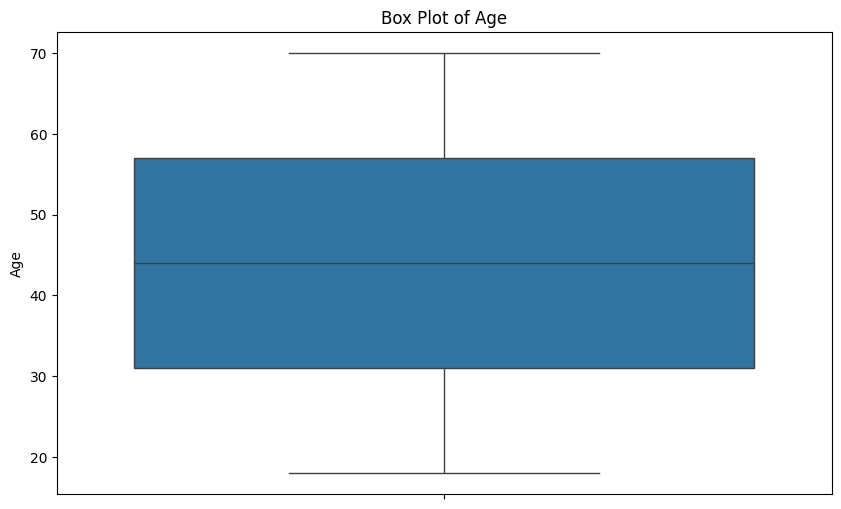

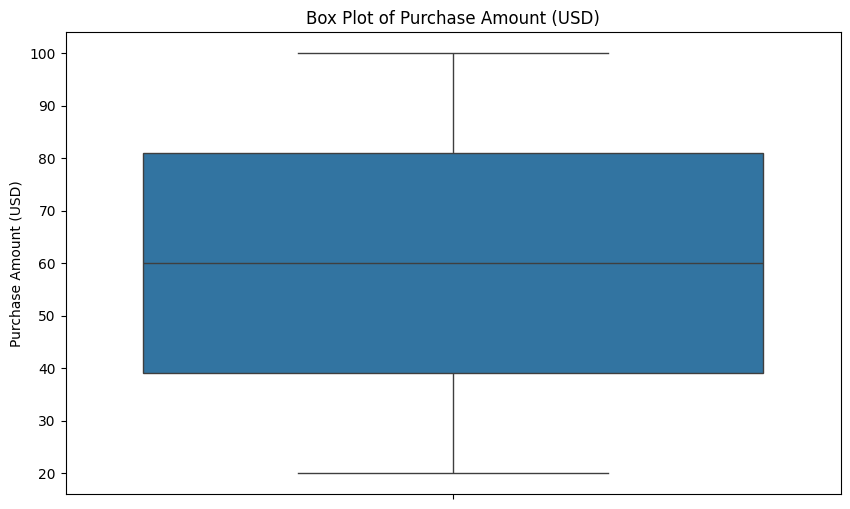

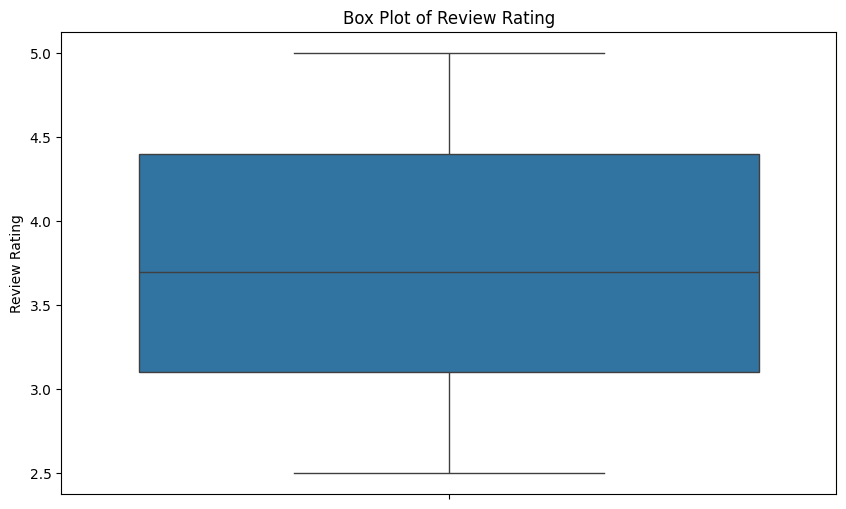

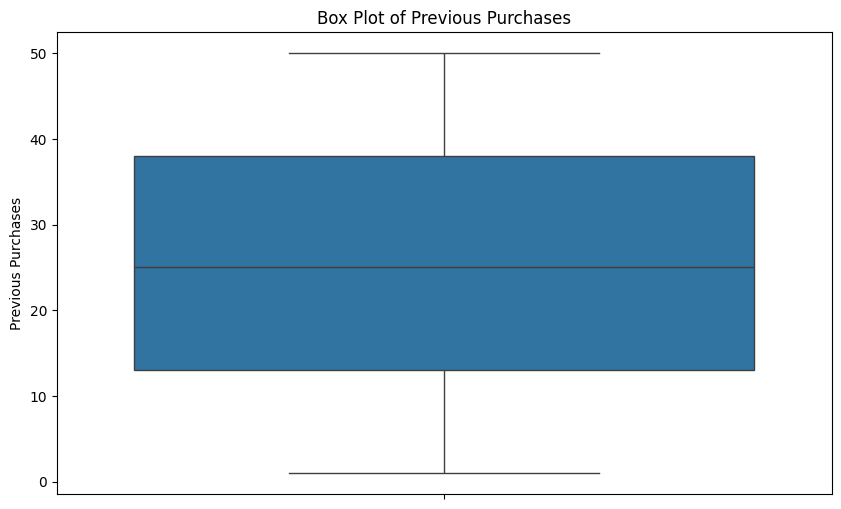

In [ ]:
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [ ]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Apply to each numerical column
for col in numerical_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f'Outliers for {col}:')
    print(outliers)

Outliers for Age:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []
Outliers for Purchase Amount (USD):
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
Index: []
Outliers for Review Rating:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [ ]:
numerical_columns = []
for col in data.columns:
  if data[col].dtype == 'int64' or data[col].dtype == 'float64':
    numerical_columns.append(col)
numerical_columns

['Customer ID',
 'Age',
 'Purchase Amount (USD)',
 'Review Rating',
 'Previous Purchases']

In [ ]:
categorical_col = []
for col in data.columns:
  if data[col].dtype == 'object':
    categorical_col.append(col)
categorical_col

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [ ]:
numerical_df = data[numerical_columns]
numerical_df

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24



1. Problem Statement:

"We want to increase the effectiveness of our marketing campaigns. Can you analyze customer purchasing behavior and demographic data to identify distinct customer segments? Specifically, we need insights into which customer groups spend the most, which have high engagement, and how we can tailor our offers to each segment."

Age vs Item Purchased, Category, Purchase Amount, Location, Size, Color, Season, Frequency of Purchases
This will give me insights into how different age groups prefer certain types of products, purchase patterns across seasons, location-based preferences, and how frequently they buy.

Gender vs Same Columns
Similarly, this will help me analyze gender-based preferences, understanding how purchasing behavior differs between males and females, what categories or product types are most popular, and other patterns.

In [ ]:
data.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly


(   Gender     Age
 0  Female   54921
 1    Male  116946,
 <Axes: ylabel='Age'>)

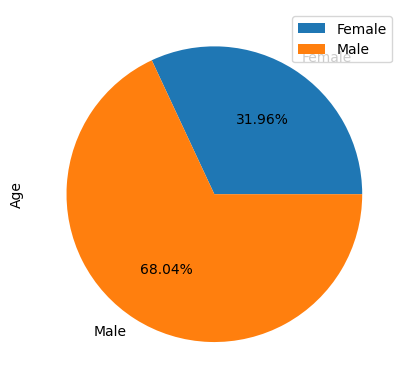

In [ ]:
#Firstly, I can check which gender has maximum age

age_vs_gender = data.groupby('Gender')['Age'].sum().sort_index(ascending = True).reset_index()
age_vs_gender, age_vs_gender.plot(kind='pie', y='Age', labels=age_vs_gender['Gender'], autopct='%1.2f%%')


In [ ]:
#to determine which gender is more prevalent at various age groups

age_vs_gender_count = data.groupby(['Age','Gender']).size().reset_index(name='Count')
pivoting = age_vs_gender_count.pivot(columns = 'Gender', index = 'Age', values = 'Count')
pivoting['Total'] = pivoting['Female']+pivoting['Male']
pivoting['female_density'] = pivoting['Female']/ pivoting['Total']
pivoting['male_density'] = pivoting['Male']/ pivoting['Total']
pivoting.sort_index(ascending = True)

Gender,Female,Male,Total,female_density,male_density
Age,,,,,
18,20,49,69,0.289855,0.710145
19,27,54,81,0.333333,0.666667
20,12,50,62,0.193548,0.806452
21,19,50,69,0.275362,0.724638
22,28,38,66,0.424242,0.575758
23,25,46,71,0.352113,0.647887
24,21,47,68,0.308824,0.691176
25,21,64,85,0.247059,0.752941
26,25,44,69,0.362319,0.637681


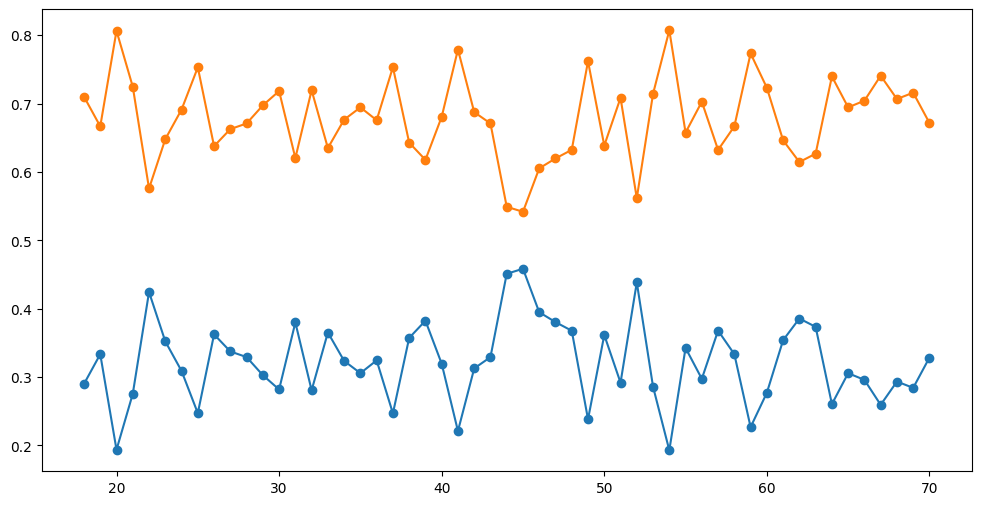

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pivoting.index, pivoting['female_density'], label='Female Density', marker='o')
plt.plot(pivoting.index, pivoting['male_density'], label='Male Density', marker='o')

In [ ]:
#Age vs Item_purchase
#Here I can compare 3 columns including age vs item purchase vs purchase amount
#This will brief me about what product is being preferred by what age group with respect to average purchase amount.

age_item_purchase = data.groupby(['Age','Item Purchased'])['Purchase Amount (USD)'].mean().sort_index(ascending = True).reset_index()
age_item_purchase

,Age,Item Purchased,Purchase Amount (USD)
0,18,Backpack,94.000000
1,18,Belt,48.000000
2,18,Blouse,56.000000
3,18,Boots,79.000000
4,18,Coat,51.600000
...,...,...,...
1245,70,Skirt,23.500000
1246,70,Sneakers,69.000000
1247,70,Socks,60.714286
1248,70,Sweater,52.500000


In [ ]:
#age vs category
age_category = data.groupby(['Age','Category'])['Purchase Amount (USD)'].mean().sort_index(ascending = True).reset_index()
age_category

,Age,Category,Purchase Amount (USD)
0,18,Accessories,57.388889
1,18,Clothing,60.393939
2,18,Footwear,69.750000
3,18,Outerwear,55.500000
4,19,Accessories,60.080000
...,...,...,...
207,69,Outerwear,61.200000
208,70,Accessories,58.920000
209,70,Clothing,58.500000
210,70,Footwear,52.333333


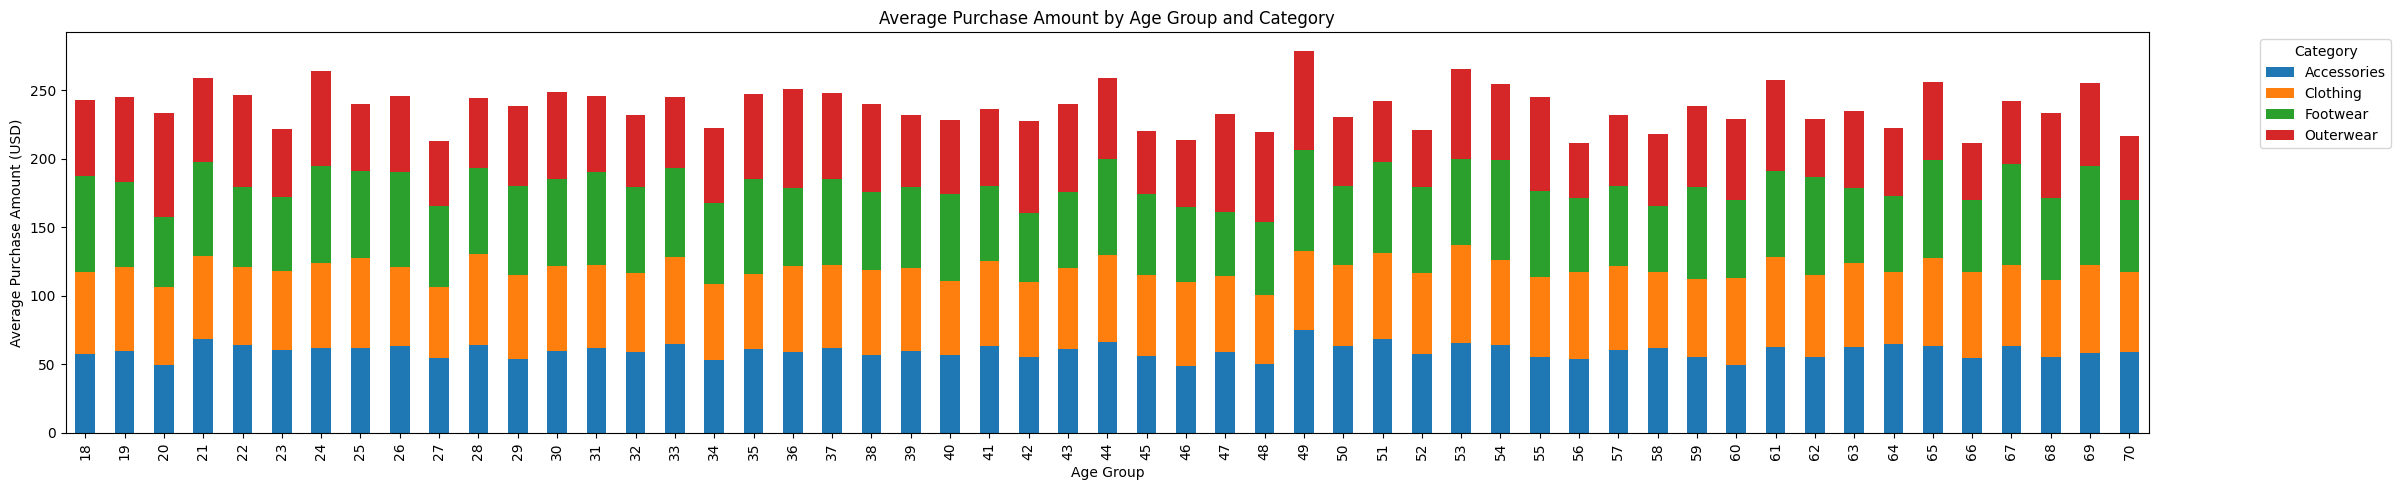

In [ ]:
pivot_age_category = age_category.pivot(index='Age', columns='Category', values='Purchase Amount (USD)')

# Plot stacked bar chart
ax = pivot_age_category.plot(kind='bar', stacked=True, figsize=(24, 5))

# Customize plot
plt.title('Average Purchase Amount by Age Group and Category')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
#Now I can analyze between customer_id and location.
#This analysis will give me details of the locations that has observed the most sales based on purchase amount.
#But since there are hug data for id its better to explore among gender and location as id is segmented into male and female.
id_vs_location = data.groupby(['Location','Gender'])['Purchase Amount (USD)'].sum().sort_index(ascending = True).reset_index()
id_vs_location


#This analysis will give me details about the locations which has generated highest and lowest amount of sales with respect to Gender

,Location,Gender,Purchase Amount (USD)
0,Alabama,Female,1678
1,Alabama,Male,3583
2,Alaska,Female,1730
3,Alaska,Male,3137
4,Arizona,Female,1658
...,...,...,...
95,West Virginia,Male,3935
96,Wisconsin,Female,1335
97,Wisconsin,Male,2861
98,Wyoming,Female,1071


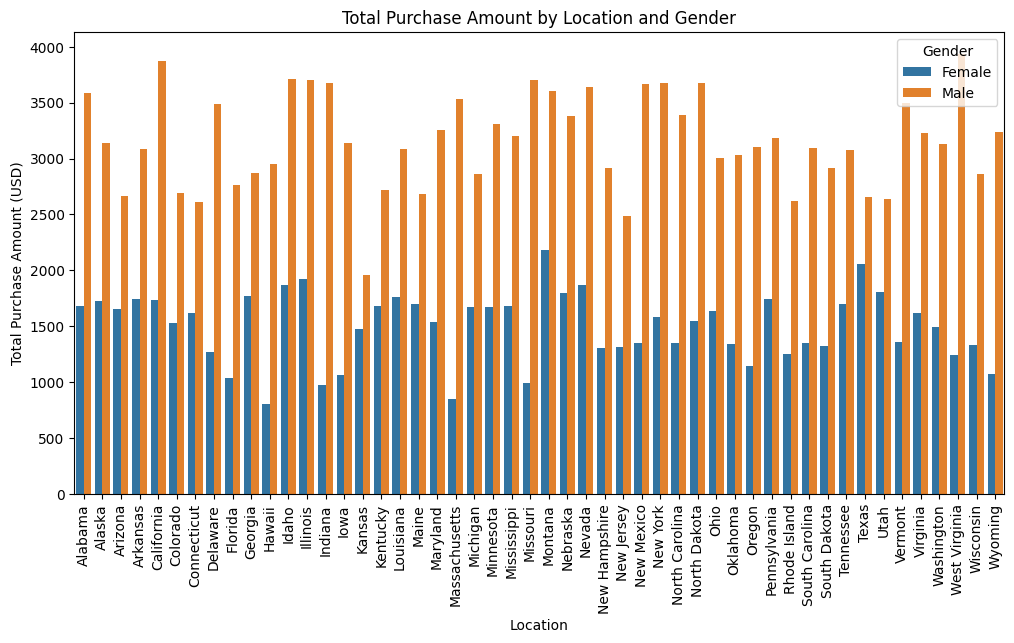

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Purchase Amount (USD)', hue='Gender', data=id_vs_location)
plt.xticks(rotation=90)  # Rotate x labels if they are too long
plt.title('Total Purchase Amount by Location and Gender')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly


In [ ]:
data['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60])

In [ ]:
#From an operations perception I need to understand what size and color is most preferred among different genders and age groups.
#This will help the operations to target on which color and size  they need manufacture in higher volume to attract the consumers.
#for gender

color_vs_size_vs_gender = data.groupby(['Color','Size','Gender'])['Purchase Amount (USD)'].mean().sort_index(ascending = True).unstack()
color_vs_size_vs_gender

Gender          Female       Male
Color  Size                      
Beige  L     59.888889  63.095238
       M     55.888889  59.632653
       S     59.833333  64.238095
       XL    61.857143  59.250000
Black  L     52.000000  57.457143
...                ...        ...
White  XL    59.000000  69.071429
Yellow L     62.500000  57.153846
       M     54.481481  59.054054
       S     54.750000  61.857143
       XL    69.000000  64.176471

[100 rows x 2 columns]

In [ ]:
#for age - since I have already calculated what density, it has cleared me that which age group holds the most share.
#Through this analysis the operations can target and manager the volume of their products


color_vs_size_vs_age = data.groupby(['Color','Size','Age'])['Purchase Amount (USD)'].mean().sort_index(ascending = True).reset_index()
color_vs_size_vs_age

,Color,Size,Age,Purchase Amount (USD)
0,Beige,L,18,91.000000
1,Beige,L,19,76.000000
2,Beige,L,23,69.666667
3,Beige,L,25,22.500000
4,Beige,L,26,90.000000
...,...,...,...,...
2595,Yellow,XL,57,52.500000
2596,Yellow,XL,63,93.000000
2597,Yellow,XL,65,66.500000
2598,Yellow,XL,67,37.000000


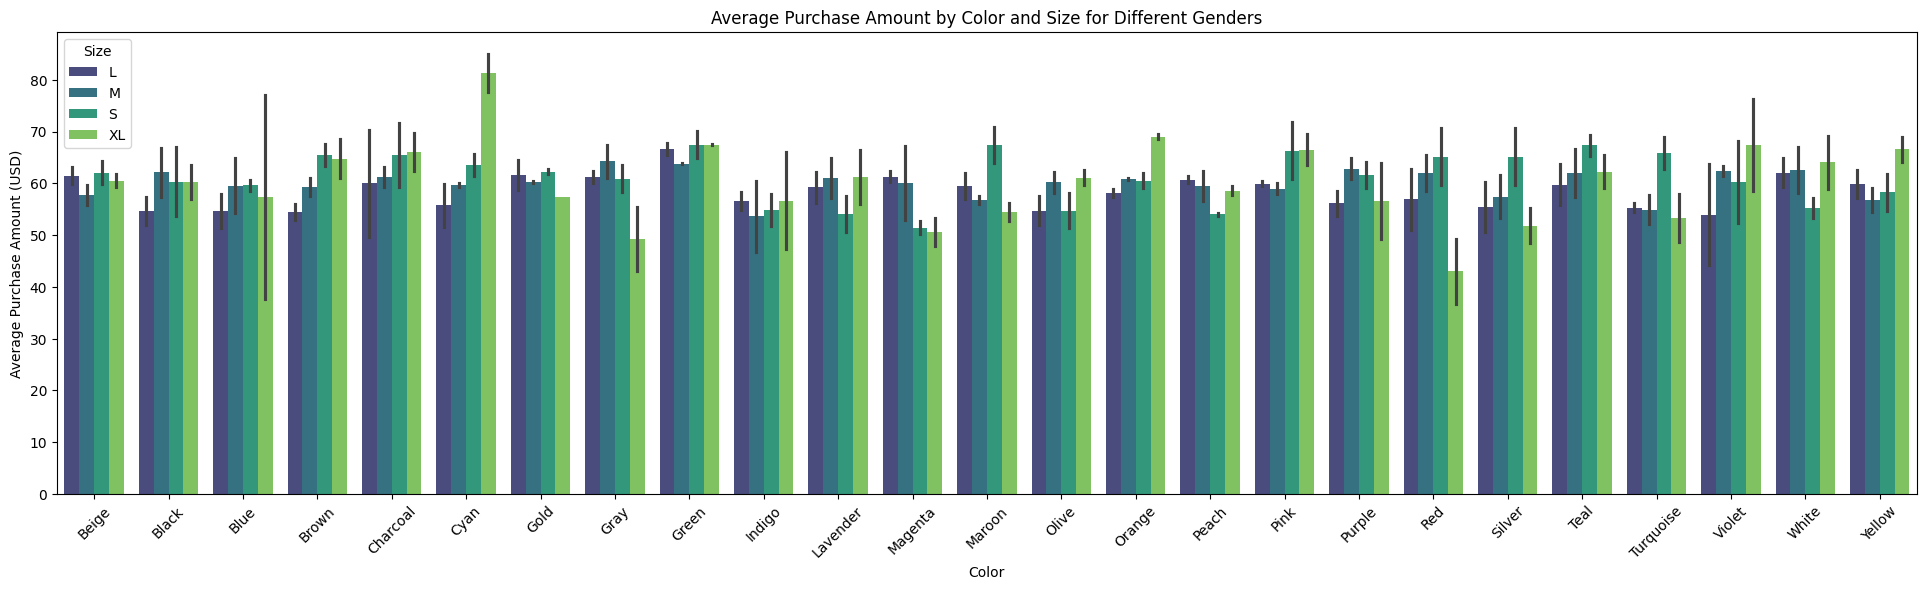

In [ ]:
color_vs_size_vs_gender = data.groupby(['Color', 'Size', 'Gender'])['Purchase Amount (USD)'].mean().unstack()

# Reset index for plotting
color_vs_size_vs_gender = color_vs_size_vs_gender.reset_index()

# Melt DataFrame for plotting
melted_gender = color_vs_size_vs_gender.melt(id_vars=['Color', 'Size'], var_name='Gender', value_name='Average Purchase Amount (USD)')

# Plot
plt.figure(figsize=(24, 6))
sns.barplot(data=melted_gender, x='Color', y='Average Purchase Amount (USD)', hue='Size', palette='viridis')
plt.title('Average Purchase Amount by Color and Size for Different Genders')
plt.xlabel('Color')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.show()

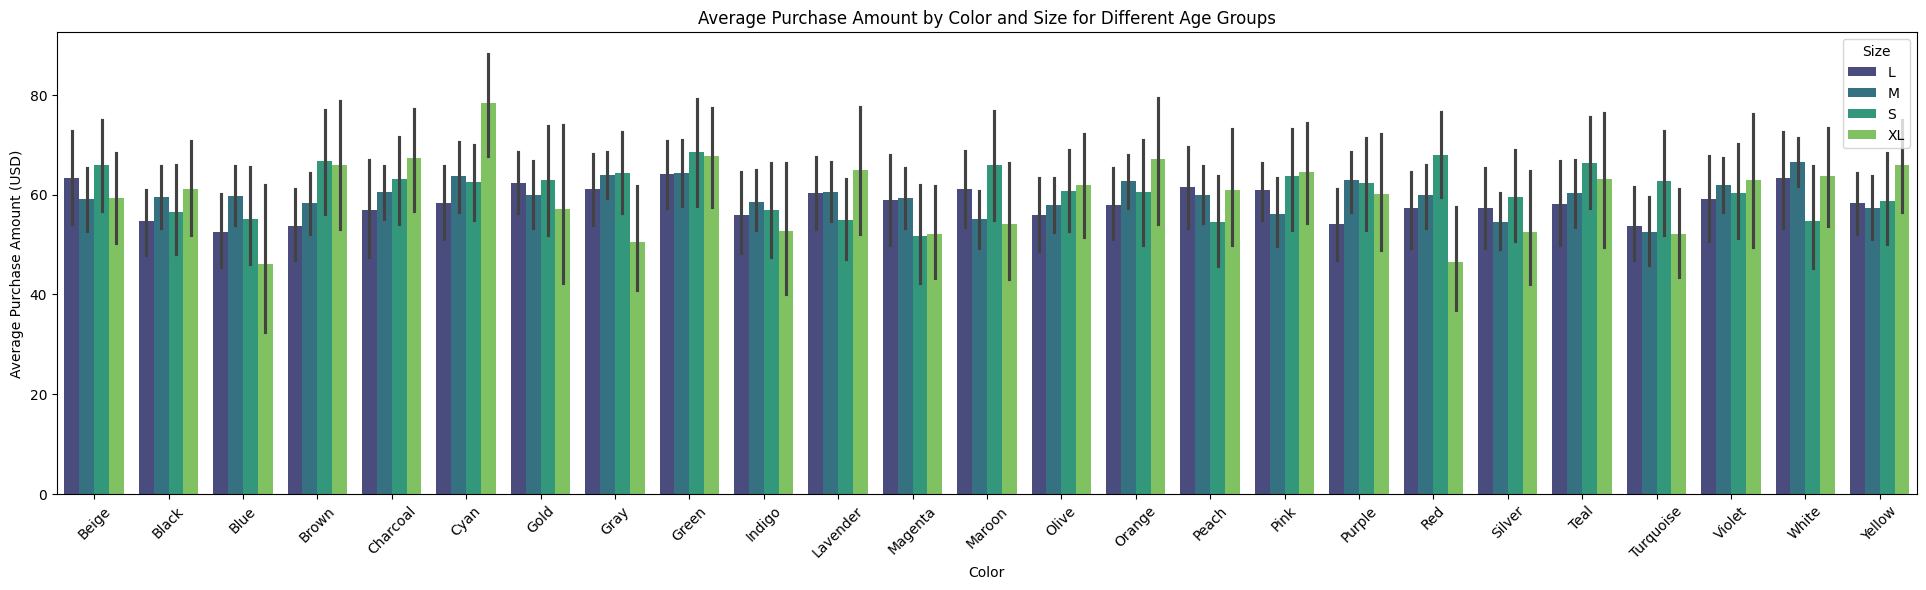

In [ ]:
color_vs_size_vs_age = data.groupby(['Color', 'Size', 'Age'])['Purchase Amount (USD)'].mean().reset_index()

# Pivot DataFrame for plotting
pivot_age_color_size = color_vs_size_vs_age.pivot_table(index=['Color', 'Size'], columns='Age', values='Purchase Amount (USD)')

# Reset index for plotting
pivot_age_color_size = pivot_age_color_size.reset_index()

# Melt DataFrame for plotting
melted_age = pivot_age_color_size.melt(id_vars=['Color', 'Size'], var_name='Age', value_name='Average Purchase Amount (USD)')

# Plot
plt.figure(figsize=(24, 6))
sns.barplot(data=melted_age, x='Color', y='Average Purchase Amount (USD)', hue='Size', palette='viridis')
plt.title('Average Purchase Amount by Color and Size for Different Age Groups')
plt.xlabel('Color')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.show()

In [ ]:
pivoting.head(10)

Gender,Female,Male,Total,female_density,male_density
Age,,,,,
18,20,49,69,0.289855,0.710145
19,27,54,81,0.333333,0.666667
20,12,50,62,0.193548,0.806452
21,19,50,69,0.275362,0.724638
22,28,38,66,0.424242,0.575758
23,25,46,71,0.352113,0.647887
24,21,47,68,0.308824,0.691176
25,21,64,85,0.247059,0.752941
26,25,44,69,0.362319,0.637681


The major part of analysing the customer behavior based on gender, age, color & size, purchase amount were:

1. The operational team can understand which gender contributes more to the top and bottom purchases. For instance, for color = Beige and size = L
Female Purchase = 59.888889	Male Purchase = 63.095238

2. Through age group analysis, the operational team can understand which age group is constributing most to their products based on color and sizes. For instance, for Color = Beige,	Size = L,	Age = 18	Purchase Amount (USD)
= 91.000000

3. Through consumer density table, the operational team can actually understand what density exits in the specific age group. For instace, at age =18, males were 71% while female were around 29%.

Conclusion: Through the above analysis, the team can easily identify that if they need to boost their production based on color and sizes. Also, if they want to boost then the team can easily understand for which age group they need to accelerate their production based on color. Beyond, they can also understand under the specific age group, which gender is their target and how much they contribute to purchase amount.

In [ ]:
#Also from the company persecption it is extremely important to understand where the purchase has increased.
#This will enable the company to take decission based on purchase increase from such as production innovation, inbuilting new strategies to drag customers etc.

#Creating a new feature to store the values.
data['purchase_diff'] = data['Purchase Amount (USD)'] - data['Previous Purchases']

#now I can compare the genders and locations based on purchase diff
summary_df = data.groupby(['Location', 'Gender'])[['Purchase Amount (USD)', 'Previous Purchases', 'purchase_diff']].sum().reset_index()

summary_df

,Location,Gender,Purchase Amount (USD),Previous Purchases,purchase_diff
0,Alabama,Female,1678,808,870
1,Alabama,Male,3583,1635,1948
2,Alaska,Female,1730,680,1050
3,Alaska,Male,3137,1343,1794
4,Arizona,Female,1658,651,1007
...,...,...,...,...,...
95,West Virginia,Male,3935,1327,2608
96,Wisconsin,Female,1335,583,752
97,Wisconsin,Male,2861,1139,1722
98,Wyoming,Female,1071,525,546


In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,purchase_diff
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,39


In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind

In [ ]:
data['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [ ]:
#Ho: Gender has no effect on Purchase Amout
#Ha: Gender has effect on purchase Amount
female_purchases = data[data['Gender'] == 'Female']['Purchase Amount (USD)']
male_purchases = data[data['Gender'] == 'Male']['Purchase Amount (USD)']
t_stat, p_value = ttest_ind(female_purchases, male_purchases, equal_var=True)  # Adjust equal_var if variances are unequal
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.8769152065030424
p-value: 0.38058673555268097



t-statistic: 0.877
p-value: 0.381
Interpretation:

Null Hypothesis (H₀): Gender has no effect on Purchase Amount.
Alternative Hypothesis (Hₐ): Gender has an effect on Purchase Amount.
Given that the p-value (0.381) is greater than the commonly used significance level (α) of 0.05, we fail to reject the null hypothesis.



---



2. Problem Statement:
"Our team wants to better understand customer purchasing patterns and preferences to enhance future marketing and promotional strategies. Can you analyze metrics like Purchase Amount (USD), Frequency of Purchases, Discount Applied, and Promo Code Used to uncover trends, such as which segments use discounts more often, and which groups are likely to spend more without promotions?"

In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,purchase_diff
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,39


In [ ]:
#The first analysis which can be done is based on purchase amount and time period.
#This will help the company to identify the frequency of product purchase.

frequency_vs_purchase = data.groupby(['Frequency of Purchases','Gender'])['Purchase Amount (USD)'].mean().sort_values(ascending = True).reset_index()
frequency_vs_purchase

,Frequency of Purchases,Gender,Purchase Amount (USD)
0,Weekly,Female,58.348837
1,Fortnightly,Male,59.023747
2,Monthly,Male,59.027174
3,Every 3 Months,Male,59.110553
4,Fortnightly,Female,59.122699
5,Quarterly,Male,59.144670
6,Weekly,Male,59.264305
7,Bi-Weekly,Female,59.914894
8,Monthly,Female,59.935135
9,Annually,Male,60.162791


<function matplotlib.pyplot.show(close=None, block=None)>

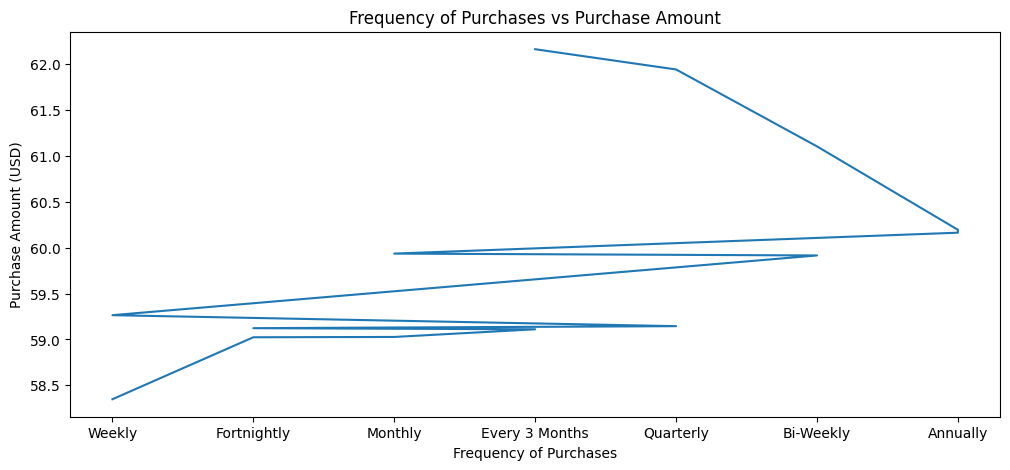

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(frequency_vs_purchase['Frequency of Purchases'], frequency_vs_purchase['Purchase Amount (USD)'])
plt.title('Frequency of Purchases vs Purchase Amount')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.show

This analysis will help manufacturers or companies understand how much customers are spending on average, depending on how frequently they make purchases. For example, customers who purchase more frequently (e.g., weekly or fortnightly) might have a different spending pattern compared to those who buy less frequently (e.g., quarterly or annually).

In [ ]:
#Location vs Frequency is a required analysis for the problem statement as this will help the company to identify purchase power(growth in product purchase) based on week, month quater, and other parameters.
frequency_vs_purchase_vs_location = data.groupby(['Frequency of Purchases','Location'])['Purchase Amount (USD)'].sum().sort_values(ascending = True).reset_index()
frequency_vs_purchase_vs_location

,Frequency of Purchases,Location,Purchase Amount (USD)
0,Fortnightly,Kansas,138
1,Every 3 Months,Tennessee,271
2,Weekly,New Jersey,289
3,Annually,Delaware,299
4,Monthly,Florida,301
...,...,...,...
345,Fortnightly,Nebraska,1168
346,Fortnightly,Alaska,1184
347,Weekly,Louisiana,1186
348,Bi-Weekly,Illinois,1375


In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,purchase_diff
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,39


In [ ]:
#Category_vs_Discount: This is an usefull insight from company's perception as it can help company understand which category of prodcuts
#provides the highest discount

cat_vs_purchase = data.groupby(['Category','Discount Applied'])['Purchase Amount (USD)'].sum().reset_index()
cat_vs_purchase

,Category,Discount Applied,Purchase Amount (USD)
0,Accessories,No,42440
1,Accessories,Yes,31760
2,Clothing,No,60585
3,Clothing,Yes,43679
4,Footwear,No,20087
5,Footwear,Yes,16006
6,Outerwear,No,10558
7,Outerwear,Yes,7966


In [ ]:
#now the analysis can be driven deep by comparing 2 major things:

##1. The first part can be done for categories without discount
cat_no_discount = data[data['Discount Applied'] == 'No']
cat_without_discount = cat_no_discount.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending = False).reset_index()
cat_without_discount

#2. Second part can be done for categories with discount
cat_with_discount = data[data['Discount Applied'] == 'Yes']
cat_got_discount = cat_with_discount.groupby('Gender')['Purchase Amount (USD)'].sum().sort_values(ascending = False).reset_index()
cat_got_discount


print(cat_without_discount)
print(cat_got_discount)

   Gender  Purchase Amount (USD)
0  Female                  75191
1    Male                  58479
  Gender  Purchase Amount (USD)
0   Male                  99411


In [ ]:
diff_vs_cat = data.groupby('Category')['purchase_diff'].sum().sort_values(ascending = False).reset_index()
diff_vs_cat

,Category,purchase_diff
0,Clothing,60493
1,Accessories,42300
2,Footwear,20979
3,Outerwear,10438


In [ ]:
#To drive further deep we can categorize the female and male products seperately.
#further we can check if by providing discount the prices increased or decreased
#This wil help the company to focus towards discount based on the factor if it is beneficial or not.

#part A: seperating products based on male and female gender.
product_for_male = data [data['Gender'] == 'Male']
product_for_female = data [data['Gender'] == 'Female']

#Now checking the discounts
without_discounts = product_for_male[product_for_male['Discount Applied'] == 'No']
without_discounts_female = product_for_female[product_for_female['Discount Applied'] == 'No']
with_discounts = product_for_male[product_for_male['Discount Applied'] == 'Yes']

In [ ]:
a = with_discounts.groupby('Item Purchased')['purchase_diff'].mean().reset_index()
a

,Item Purchased,purchase_diff
0,Backpack,34.312500
1,Belt,34.041667
2,Blouse,34.620690
3,Boots,35.597015
4,Coat,27.291139
5,Dress,28.306667
6,Gloves,31.500000
7,Handbag,35.524590
8,Hat,33.311688
9,Hoodie,33.617647


In [ ]:
b = without_discounts.groupby('Item Purchased')['purchase_diff'].mean().reset_index()
b

,Item Purchased,purchase_diff
0,Backpack,35.642857
1,Belt,39.029412
2,Blouse,33.340426
3,Boots,36.962963
4,Coat,29.514286
5,Dress,38.641026
6,Gloves,34.255814
7,Handbag,27.764706
8,Hat,42.120000
9,Hoodie,31.968750


<Axes: xlabel='Item Purchased', ylabel='purchase_diff'>

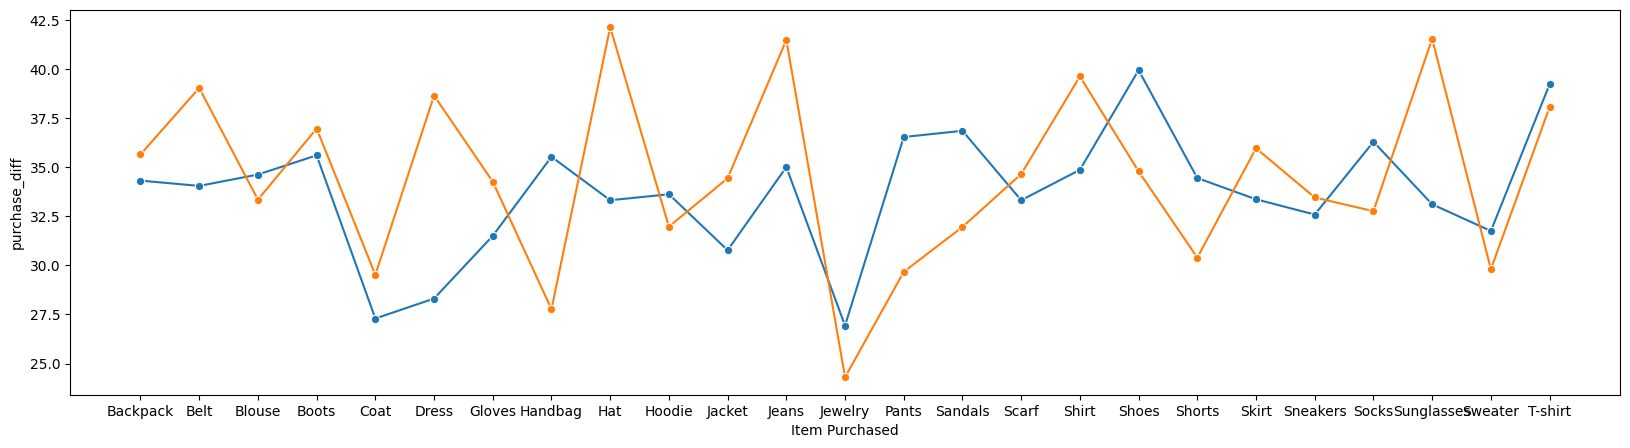

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(x= 'Item Purchased', y= 'purchase_diff',  data = a, marker = 'o')
sns.lineplot(x= 'Item Purchased', y= 'purchase_diff', data = b, marker = 'o')

1. From the above analysis it is clearly dervied that under the "no discount policy", both the genders were involved as female were around 75k while male were around 58k.

2. But under the "discount policy", the products for male gender were given discount which excluded the female products.

3. Through this analysis, the company can understand that only male products were given discount.

4. Moreover, through the deep drive analysis, it is clear that this analysis will help the company to understand when discount was given to the products then how the purchase_diff has changed. For instance, taking "BACKPACK" as the targeted product, this product has observed that when discount was given the *purchase_diff* was reduced and was at 34.31 USD, whereas, without discount the same proudct has observed a purchase_diff of 35.64. Which simply means that the purchase_rate is highly impacted by discounts.

In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,purchase_diff
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,39


In [ ]:
#One last analysis which can be done for the given problem statement is based on purchase_vs_payment method
#This analysis will help companies to immplement new strategies for their customers by targetting the convenience mode while product purchase.

mode_vs_purchase = data.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending = False).reset_index()
mode_vs_purchase

,Payment Method,Purchase Amount (USD)
0,Credit Card,42567
1,Venmo,39991
2,Cash,38833
3,PayPal,37449
4,Bank Transfer,37123
5,Debit Card,37118


<ipython-input-61-c0e352d000ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Purchase Amount (USD)', data=mode_vs_purchase, palette='viridis')


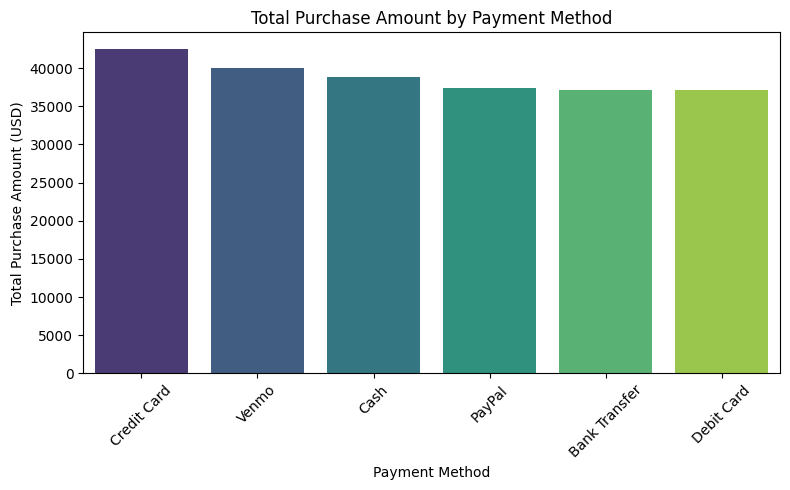

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', data=mode_vs_purchase, palette='viridis')

# Set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Total Purchase Amount by Payment Method')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

This analysis will help the company to easily gather the flow of payment and they can accordingly plan their moment towards convenience aspects with respect to payments so that they can captivate consumer focus by providing them higher convenience when purchasing products. Forinstance, payment through credit card score highest purchase with USD 42567, while debit card was least used and has generated as sales of USD 37118.

In [ ]:
 data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'purchase_diff'],
      dtype='object')

In [ ]:
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,purchase_diff
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,39


Problem Statement:
 "Predict which customers are at risk of churning based on their purchase history and engagement metrics."

In [ ]:
#Develop a model to identify customers who may stop purchasing in the near future, allowing for targeted retention efforts.
#To solve this puzzel I can essentially include purchase_diff as my key column and I can compare that with cat and gender.
#This analysis will show that how specific genders have been showing interest towards the company's products.
#since we have around 3900 customer_id it will be difficult for the company to focus on each customer specifically.
#To offer and enhance the company's planning for this case, I can take Age and Gender as my comparable features instead of taking 'Customer_id'
#Also I can check which gender has been impacting the most.
# I can also identify that which category and Items are impacting the most interms of purchase_diff.

#So the final model whill be :: age vs gender vs category vs item purchased vs purchase diff.
#This analysis will be a brief analysis which will help the company to understand how they can manufacture the products that are recorded the highest dip.
churn_rate_age = data.groupby(['Age','Gender','Category','Item Purchased'])['purchase_diff'].sum().reset_index()
churn_rate_age_top_10 = churn_rate_age.sort_values(by='purchase_diff', ascending = False).head(10)
churn_rate_age_top_10

,Age,Gender,Category,Item Purchased,purchase_diff
1345,54,Male,Accessories,Hat,463
325,26,Male,Footwear,Shoes,394
1774,65,Male,Clothing,T-shirt,373
1248,51,Male,Footwear,Sandals,352
731,37,Male,Clothing,Sweater,342
685,36,Male,Accessories,Hat,285
401,28,Male,Clothing,Skirt,274
283,25,Male,Clothing,Shorts,274
872,41,Male,Clothing,Pants,270
1177,49,Male,Outerwear,Coat,267


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Hat'),
  Text(1, 0, 'Shoes'),
  Text(2, 0, 'T-shirt'),
  Text(3, 0, 'Sandals'),
  Text(4, 0, 'Sweater'),
  Text(5, 0, 'Skirt'),
  Text(6, 0, 'Shorts'),
  Text(7, 0, 'Pants'),
  Text(8, 0, 'Coat')])

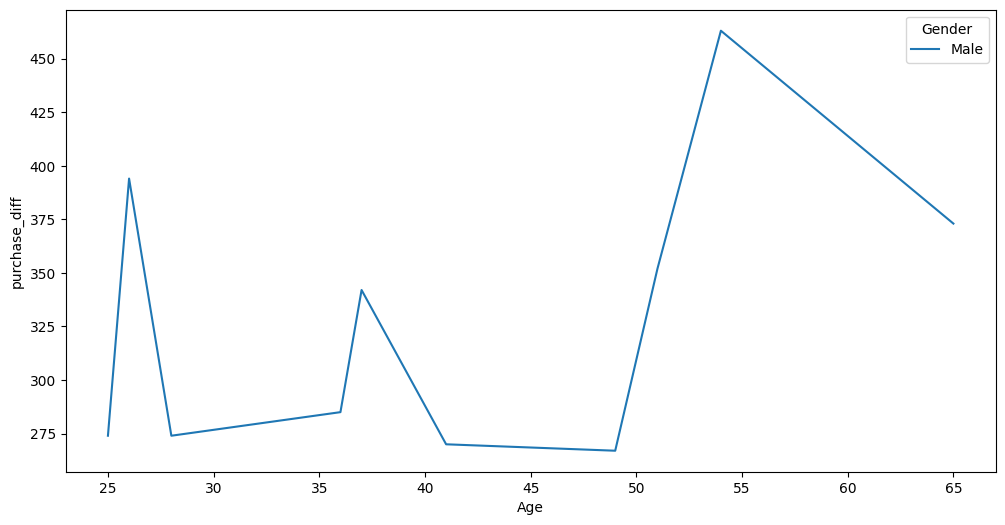

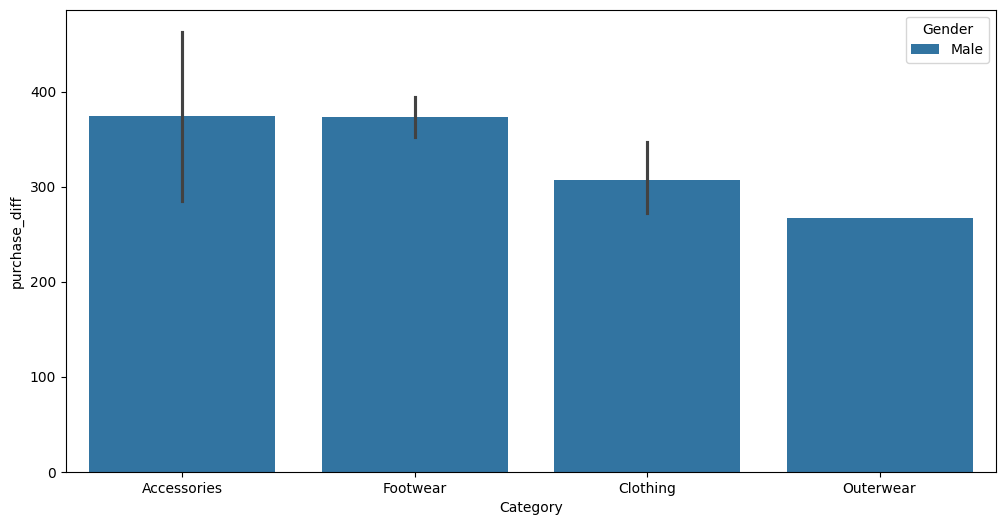

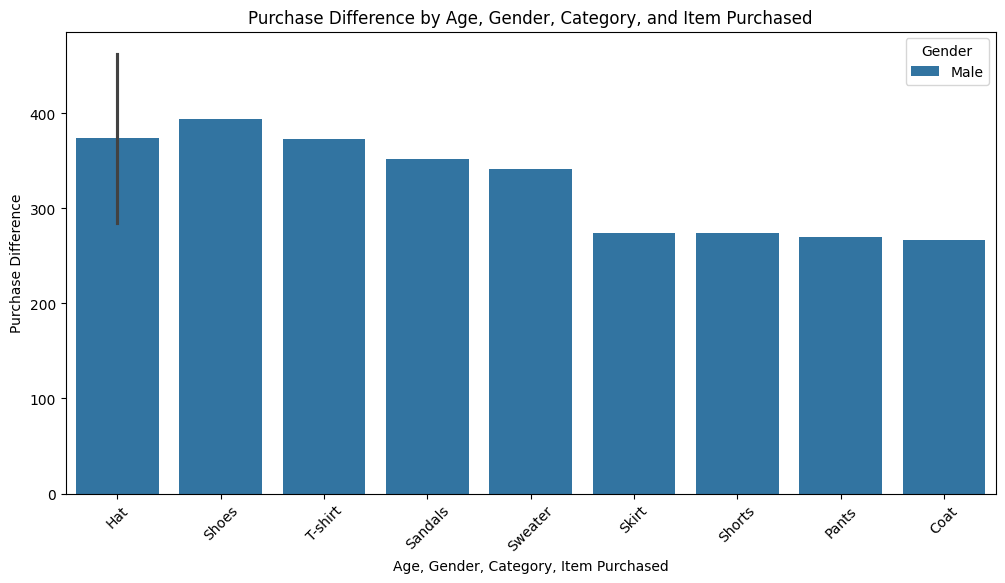

In [ ]:
#plotting for age vs purchase_diff
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='purchase_diff', hue='Gender', data=churn_rate_age_top_10,color ='red')
#plotting for category vs ourchase_diff
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='purchase_diff', hue='Gender', data=churn_rate_age_top_10)
#plotting for item vs purchase_diff
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Purchased', y='purchase_diff', hue='Gender', data=churn_rate_age_top_10)
plt.title('Purchase Difference by Age, Gender, Category, and Item Purchased')
plt.xlabel('Age, Gender, Category, Item Purchased')
plt.ylabel('Purchase Difference')
plt.xticks(rotation=45)

The above analysis has successfully showed that by adding the purchase_diff for all different ages, it is clear which specific age group has been avoiding purchases for longer duration. For instance, age group 49 has recorded a diff of around 3315 by value. Moreover, among the top 10 highest purchase_diff, no female gender was found.

In [ ]:
#To drive deep I can actually take the churn rate for females as well.

femal_churn = data[data['Gender'] == 'Female']
femal_churn_rate = femal_churn.groupby(['Age','Category','Gender','Item Purchased'])['purchase_diff'].sum().reset_index()
femal_churn_rate_top_10= femal_churn_rate.sort_values(by='purchase_diff', ascending = False).head(10)
femal_churn_rate_top_10

,Age,Category,Gender,Item Purchased,purchase_diff
514,50,Footwear,Female,Sneakers,243
503,50,Accessories,Female,Hat,237
151,28,Accessories,Female,Handbag,211
439,46,Clothing,Female,Shirt,211
115,26,Accessories,Female,Backpack,207
783,69,Accessories,Female,Jewelry,203
29,19,Outerwear,Female,Coat,201
159,28,Clothing,Female,Skirt,199
552,53,Clothing,Female,Blouse,187
553,53,Clothing,Female,Pants,180


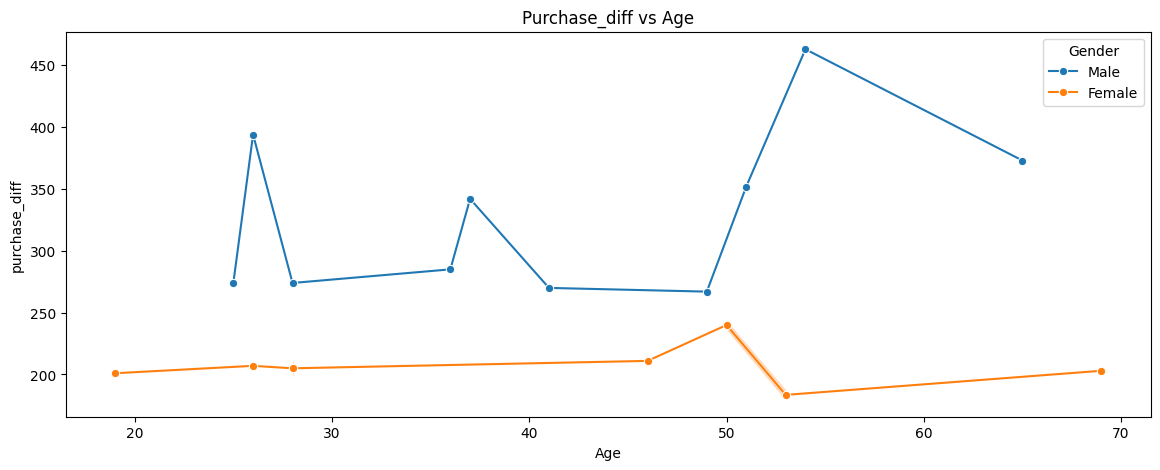

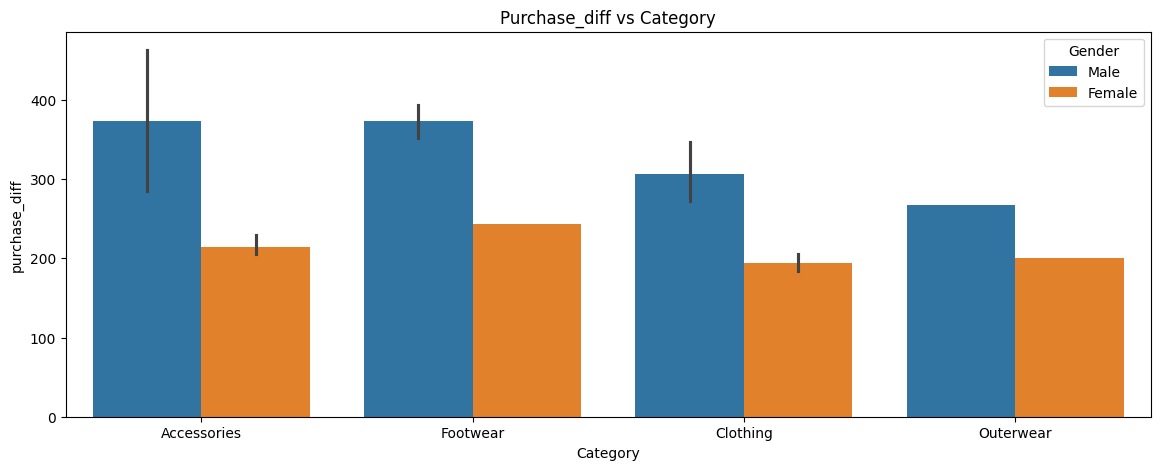

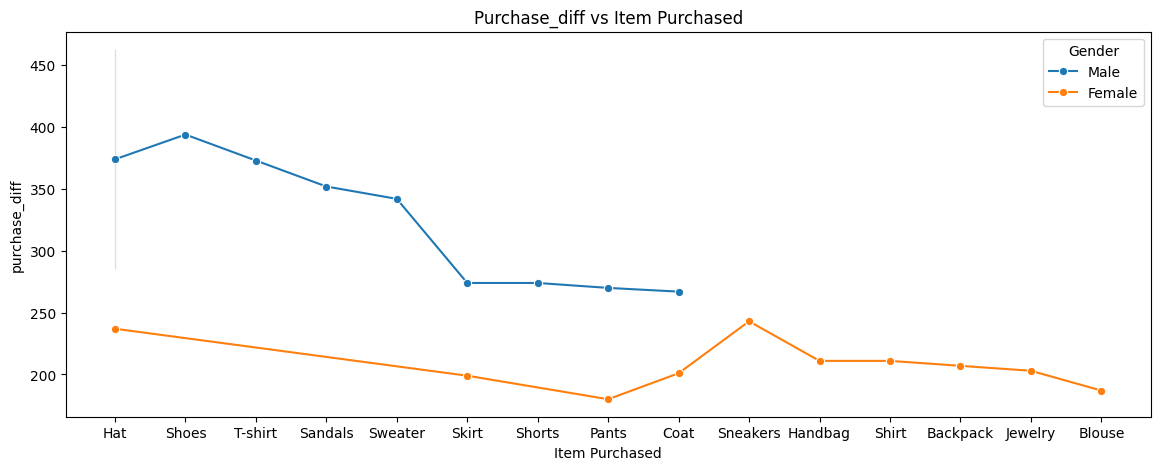

In [ ]:
combined_churn_rate = pd.concat([churn_rate_age_top_10, femal_churn_rate_top_10], ignore_index=True)
combined_churn_rate
#Plotting
plt.figure(figsize=(14,5))
sns.lineplot(x='Age', y = 'purchase_diff', data = combined_churn_rate, hue = 'Gender', marker = 'o' )
plt.title("Purchase_diff vs Age")
plt.show()

#Plotting2
plt.figure(figsize=(14,5))
sns.barplot(x='Category', y = 'purchase_diff', data = combined_churn_rate, hue = 'Gender' )
plt.title("Purchase_diff vs Category")
plt.show()
#Plotting3
plt.figure(figsize=(14,5))
sns.lineplot(x='Item Purchased', y = 'purchase_diff', data = combined_churn_rate, hue = 'Gender', marker = 'o' )
plt.title("Purchase_diff vs Item Purchased")
plt.show()

By including both male and female gender the company can focus on the common products which are recorded with higher purchase_diff. For instance, one of the commn product is hat, as for male it has recorded 463 diff while for females it was 243 diff. Moreover,  visualizations will indeed help the company understand the key factors influencing churn, enabling more targeted marketing and retention strategies.

In [ ]:
#Now I can compare the products which are common for both the genders.
#This will help the company to focus on these specific products as
#These products are pulling the purchase_diff significantly.
a = femal_churn_rate['Item Purchased'].unique()
b = churn_rate_age_top_10['Item Purchased'].unique()
for i in a:
  if i in b:
    print(i)

Hat
Shorts
Coat
Skirt
Sweater
Sandals
Shoes
Pants
T-shirt


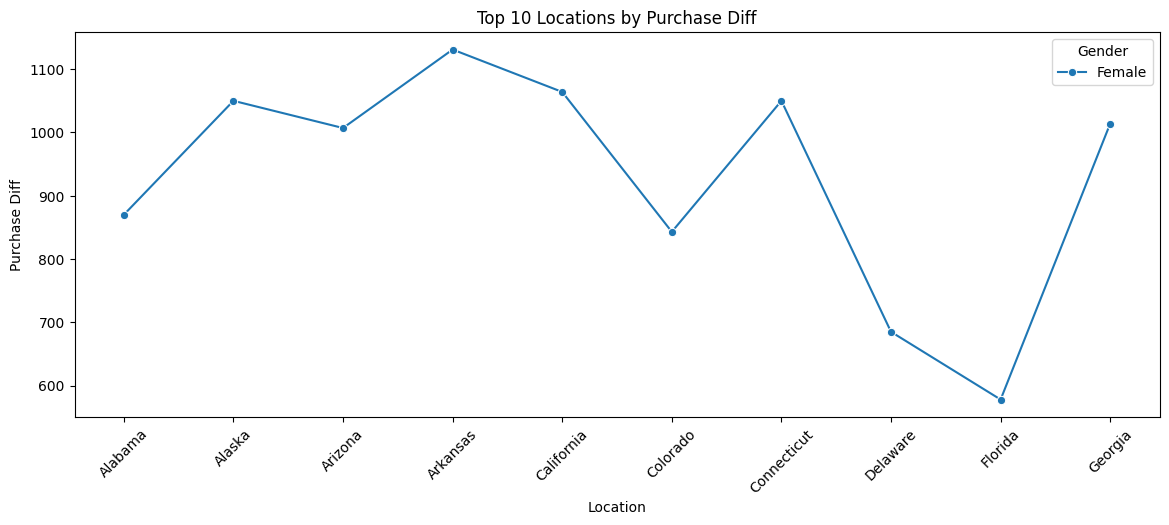

In [ ]:
#The final analysis can be done on locations.
#By understanding the geographical situations, the company can identify and focus on the specific locations.

location_churn = data.groupby(['Gender','Location'])['purchase_diff'].sum().reset_index()
location_churn_top_10 = location_churn.head(10)
plt.figure(figsize=(14,5))
sns.lineplot(x='Location', y='purchase_diff', data=location_churn_top_10, marker='o', hue='Gender')
plt.title('Top 10 Locations by Purchase Diff')
plt.xlabel('Location')
plt.ylabel('Purchase Diff')
plt.xticks(rotation=45)
plt.show()

These are are the key products that are impacting the churn. This analysis will help the company in the following ways:
1. Firtsly, the difference between male and female gender is gather. It was found that male gender are oberving the highest purchase_diff.

2. From the above analysis the company can also understand which products and category are observing the highest decline.

In [ ]:
location_churn_top_10

,Gender,Location,purchase_diff
0,Female,Alabama,870
1,Female,Alaska,1050
2,Female,Arizona,1007
3,Female,Arkansas,1131
4,Female,California,1064
5,Female,Colorado,843
6,Female,Connecticut,1050
7,Female,Delaware,685
8,Female,Florida,578
9,Female,Georgia,1014


In [ ]:
male_location_churn = location_churn[location_churn['Gender'] == 'Male']
male_location_churn_top_10 = male_location_churn.sort_values(by='purchase_diff', ascending=False).head(10)
male_location_churn_top_10

,Gender,Location,purchase_diff
97,Male,West Virginia,2608
61,Male,Idaho,2325
70,Male,Massachusetts,2240
54,Male,California,2214
81,Male,New York,2155
77,Male,Nevada,2155
75,Male,Montana,2127
63,Male,Indiana,2094
83,Male,North Dakota,2077
80,Male,New Mexico,2073


In [ ]:
c = location_churn_top_10['Location'].unique()
d = male_location_churn_top_10['Location'].unique()
for i in c:
  if i in d:
    print(i)

California


Key Insights for Females:
Top Churn Locations:

Arkansas (1131), California (1064), and Georgia (1014) have the highest purchase_diff for female customers.
These areas are seeing a decline in purchase frequency, suggesting female customers in these regions are at higher risk of churning.
Comparison with Males:

California appears for both genders, but the male purchase_diff is significantly higher (2214 for males vs. 1064 for females).
Florida and Georgia also have noticeable churn rates among females but don't appear in the top male locations.